In [2]:
import pytesseract
#Python based ocr recognition tool ,which can be used to extract text from images
import cv2
#Python library for computer vision, which provides support for reading, displaying, and processing images.
import re
#Python regular expression library.
#  It provides functions to work with regular expressions,
#  which are a powerful tool for matching and manipulating text.
from pytesseract import Output
#"Output" is a class from the "pytesseract" package, 
# which provides various configurations for the output generated by the OCR engine.
import matplotlib.pyplot as plt

In [3]:
#Read Image
img=cv2.imread("Aadhaar_letter_large.png") 
# Function used to read a file, & store it as a matrix
#The function takes the path of the image file as 
# an argument and returns the matrix representation of the image. 

gray_img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#Converting images to gray scale



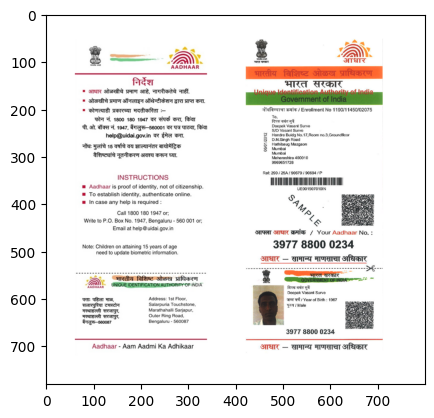

In [4]:
imgg = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(imgg)

benefits

* Simplification: Converting an image to grayscale simplifies the image and reduces the amount 

 of data that needs to be processed, making image processing faster and more efficient.

* Improved accuracy: Image processing algorithms often work better on grayscale images
 
  as compared to color images. This is because grayscale images have less information
 
  to process and are less complex, leading to improved accuracy in detecting objects or patterns in the image.

* Reduced noise: Converting an image to grayscale can also reduce noise 

  and improve the quality of the image, making it easier for image detection

   algorithms to find the objects or patterns in the image.

* Memory usage: Storing a grayscale image requires less memory as compared to storing

  a color image, making it more feasible to process large images.

In [5]:
data=pytesseract.image_to_data(gray_img,output_type=Output.DICT)
data.keys()
# This converts image into a text dictionary data form

dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])

The keys in the data dictionary represent various 

attributes of the text recognized from the image. These keys are:

level: Represents the hierarchy level of the text block, with 0 being the 

highest level (most encompassing block).

page_num: The page number of the image.

block_num: Represents the number of the block the text belongs to.

par_num: Represents the number of the paragraph the text belongs to.

line_num: Represents the number of the line the text belongs to.

word_num: Represents the number of the word the text belongs to.

left: The x-coordinate of the top left corner of the bounding box surrounding 

the text.

top: The y-coordinate of the top left corner of the bounding box surrounding 

the text.

width: The width of the bounding box surrounding the text.

height: The height of the bounding box surrounding the text.

conf: The confidence score assigned by Tesseract to the recognition result, 

with higher values indicating more confidence.

text: The text recognized from the image.

In [6]:
len(data['text'])

242

In [7]:
n_boxes=len(data['text'])
for i in range(n_boxes):
    if data['conf'][i]>60:
        x,y,w,h=data['left'][i],data['top'][i],data['width'][i],data['height'][i]
        img=cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
cv2.imshow('Aadhaar',img)
cv2.waitKey()
cv2.destroyAllWindows()

* This code is using OpenCV (cv2) to draw rectangles around text recognized 
 
 from an image using Pytesseract (pytesseract).

* The code first counts the number of text boxes found in the image and stores 
 
 it in the n_boxes variable.

* Next, it uses a for loop to iterate through all the boxes, and checks the 
 
 confidence score of each recognition result using the data['conf'][i] 
 
 expression. If the confidence score is greater than 60, a rectangle is drawn 
 
 around the text using the cv2.rectangle method. The coordinates of the 
 
 rectangle are defined using the left, top, width, and height values in the 
 
 data dictionary.

* Finally, the image with the rectangles is displayed using the cv2.imshow
 
 method and the user is asked to press any key to close the window using cv2.
 
 waitKey(). The window is then destroyed using cv2.destroyAllWindows().




In [8]:
#Aadhaar_Pattern='^[2-9]{1}[0-9]{3}\s[0-9]{4}\s[0-9]{4}$'
Aadhaar_Pattern='^[2-9]{1}[0-9]{3}\s[0-9]{4}$'

#Aadhaar_Pattern='^[2-9]{1}[0-9]{3}$'

* The variable Aadhaar_Pattern is storing a regular expression pattern in the 

form of a string. The pattern is intended to match the format of an Indian 

Aadhaar number, which is a unique identification number issued to residents 

of India.

The pattern uses the following elements:

^ matches the start of the string.

[2-9]{1} matches a single digit between 2 and 9.

[0-9]{3} matches three digits between 0 and 9.

\s matches a white-space character.

[0-9]{4} matches four digits between 0 and 9.

$ matches the end of the string.

So, the pattern matches strings that start with a digit between 2 and 9, 

followed by three digits, a white-space, and four more digits. This matches 

the format of an Aadhaar number: XXXX XXXX.





In [9]:
img=cv2.imread("Aadhaar_letter_large.png")
data=pytesseract.image_to_data(img,output_type=Output.DICT)

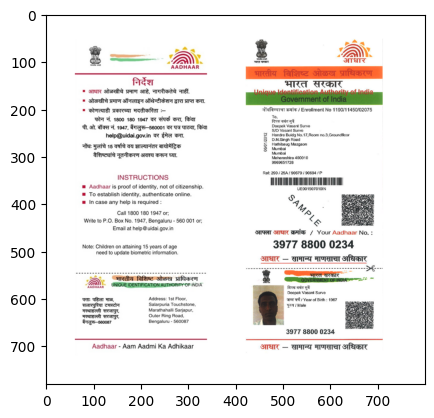

In [10]:
img1 = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img1)

In [11]:
n_boxes=len(data['text'])
a_num=''
for i in range(n_boxes):
    if len(data['text'][i])==4 and data['text'][i].isdigit():
        a_num=a_num+data['text'][i]+' '+data['text'][i+1]
print(a_num)

1800 1901047 ae1800 1801947 or,3977 88008800 02340234 1087 3977 88008800 02340234 


This code is checking the recognized text boxes to extract an Indian Aadhaar number.

The code first counts the number of text boxes found in the image and stores 

 it in the n_boxes variable.

Next, it uses a for loop to iterate through all the boxes. For each box, it 

 checks if the length of the text is 4 and the text is a digit using the len 

 and isdigit methods.

If the conditions are true, the text is appended to the a_num string with a   

 white-space and the next text box. This is done because the Aadhaar number 
 
 is formatted as XXXX XXXX, with a white-space between the first 4 digits and 
 
 the last 4 digits.

In [12]:
n_boxes=len(data['text'])
for i in range(n_boxes):
    if len(data['text'][i])==4 and data['text'][i].isdigit():
        if re.match(Aadhaar_Pattern,data['text'][i]+' '+data['text'][i+1]):
            x,y,w,h=data['left'][i],data['top'][i],data['width'][i],data['height'][i]
            img=cv2.rectangle(img,(x,y),(x+w,y+h),(0,0,0),-1)
cv2.imshow('Aadhaar',img)
cv2.waitKey()
cv2.destroyAllWindows()

- This code is using OpenCV (cv2) to highlight an Indian Aadhaar number 

 recognized from an image using Pytesseract (pytesseract) and regular expressions (re).

- The code first counts the number of text boxes found in the image and stores it in the n_boxes variable.

- Next, it uses a for loop to iterate through all the boxes. 

 For each box, it checks if the length of the text is 4 and the text is a digit using the len 

 and isdigit methods. If the conditions are true, it uses the re.match method to check if the 

 text and the next text box match the Aadhaar number pattern stored in the Aadhaar_Pattern variable. 

 If the pattern match is successful, the text boxes are highlighted using a filled rectangle created 

 by the cv2.rectangle method with a thickness of -1.

- Finally, the image with the highlighted text boxes is displayed using the cv2.imshow method and the 

user is asked to press any key to close the window using cv2.waitKey(). 

The window is then destroyed using cv2.destroyAllWindows().

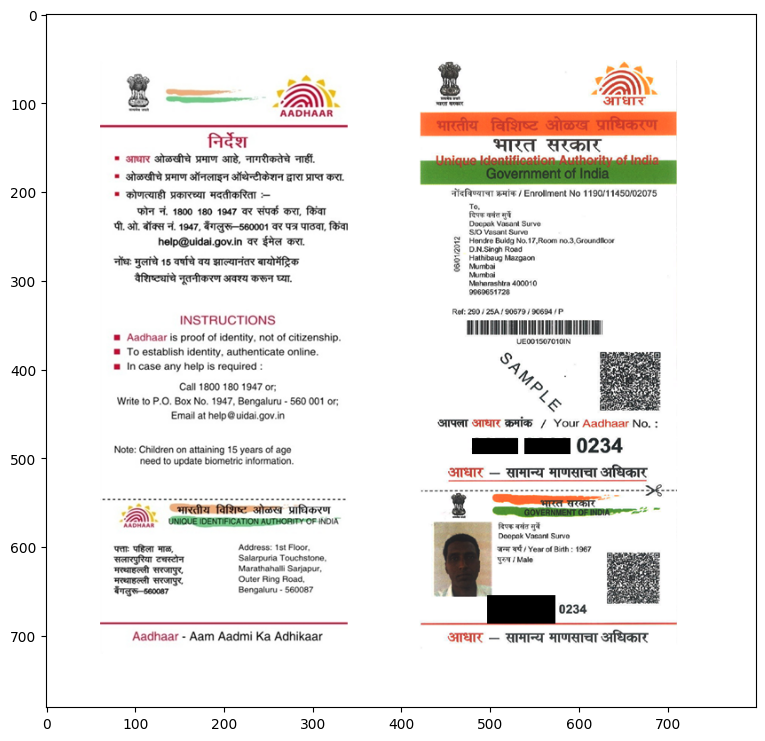

In [13]:
result = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10,9))
plt.imshow(result)